# Analyzing Track Popularity: A Machine Learning Approach to Music Success Prediction


This report presents a comprehensive analysis of track popularity prediction using machine learning techniques, including K-Means clustering, Linear Regression, and Logistic Regression. The primary objective is to explore the relationship between a track’s audio attributes and its popularity. The study begins with data preprocessing, ensuring a clean and structured dataset by handling missing values and outliers. Next, K-Means clustering is applied to segment tracks into meaningful groups based on their characteristics. Following this, Linear Regression is used to assess how different attributes influence track popularity, while Logistic Regression is employed for classification, predicting whether a song will be categorized as popular or not. The findings of this analysis provide valuable insights into the factors that contribute to a song’s success, offering a data-driven approach to understanding music popularity trends.

# Table of Contents

[Analyzing Track Popularity: A Machine Learning Approach to Music Success Prediction](#analyzing-track-popularity:-a-machine-learning-approach-to-music-success-prediction)
  - [1. Dataset Description](#1.-dataset-description)
    - [1.1 Import of libraries](#1.1-import-of-libraries)
    - [1.2 Reading the dataset for the analysis](#1.2-reading-the-dataset-for-the-analysis)
  - [2. Data Manipulation](#2.-data-manipulation)
    - [2.1 Dropping the null values of the dataset.](#2.1-dropping-the-null-values-of-the-dataset.)
    - [2.2 Hot encoding](#2.2-hot-encoding)
    - [2.3 Dropping the outliers](#2.3-dropping-the-outliers)
- [3. Segmentation Analysis](#3.-segmentation-analysis)
    - [3.1 Declaring the variables of the dataframe that are useful for the segmentation analysis](#3.1-declaring-the-variables-of-the-dataframe-that-are-useful-for-the-segmentation-analysis)
    - [3.2 Separating songs from the explanatory variables](#3.2-separating-songs-from-the-explanatory-variables)
    - [3.3 Standarizing all the explanatory varibles](#3.3-standarizing-all-the-explanatory-varibles)
    - [3.4 Searching for correlation between variables (to avoid multicolinearity)](#3.4-searching-for-correlation-between-variables-(to-avoid-multicolinearity))
    - [3.5 Defining the variables for running the model](#3.5-defining-the-variables-for-running-the-model)
    - [3.6 K-means algorithms](#3.6-k-means-algorithms)
      - [3.6.1 Elbow Method](#3.6.1-elbow-method)
      - [3.6.2 Running the K-means algorithm](#3.6.2-running-the-k-means-algorithm)
      - [3.6.3 Songs per clusters](#3.6.3-songs-per-clusters)
    - [3.7 Silhouette Score and Inertia](#3.7-silhouette-score-and-inertia)
    - [3.8 Mean popularity per cluster](#3.8-mean-popularity-per-cluster)
    - [3.9 Profiling](#3.9-profiling)
- [4. Linear Regression](#4.-linear-regression)
    - [4.1 Searching for correlation between independent variables (to avoid multicolinearity)](#4.1-searching-for-correlation-between-independent-variables-(to-avoid-multicolinearity))
    - [4.2 Testing and normalizing in the independent variables](#4.2-testing-and-normalizing-in-the-independent-variables)
    - [4.3 Defining datasets for training and testing the linear regression model](#4.3-defining-datasets-for-training-and-testing-the-linear-regression-model)
    - [4.4 Stepwise to select the variables of the model that are relevant (to avoid redundancy in the dataset)](#4.4-stepwise-to-select-the-variables-of-the-model-that-are-relevant-(in-order-to-avoid-redundancy-in-the-dataset))
    - [4.5 Running the linear regression analysis](#4.5-running-the-linear-regression-analysis)
    - [4.6 Plots of the regression line of the train and test datasets](#4.6-plots-of-the-regression-line-of-the-train-and-test-datasets)
    - [4.7 Checking for Homoscedasticity (normality in the residuals / error)](#4.7-checking-for-homoscedasticity-(normality-in-the-residuals-/-error))
    - [4.8 Evaluating the performance of the model](#4.8-evaluating-the-performance-of-the-model)
    - [4.9 Linear Regression Results](#4.9-linear-regression-results)
- [5. Classification Analysis](#5.-classification-analysis)
    - [5.1 Defining datasets for training and testing](#5.1-defining-datasets-for-training-and-testing)
    - [5.2 Stepwise function for Classification Analysis](#5.2-stepwise-function-for-classification-analysis)
    - [5.3 Searching for correlation between variables (to avoid multicolinearity)](#5.3-searching-for-correlation-between-variables-(to-avoid-multicolinearity))
    - [5.4 Classification Results](#5.4-classification-results)
    - [5.5 Confusion Matrix](#5.5-confusion-matrix)
    - [5.6 ROC Curve](#5.6-roc-currve)

## 1. Dataset Description

The dataset used in this project contains various musical and metadata features related to tracks, which will be use for analysis and machine learning modeling for segmentation and regression.

The key variables include:

1. Metadata Attributes: Includes year, track_name, album, artist_name, and artist_genres, which provide descriptive information about the track and artist.
2. Popularity Metrics: track_popularity (ranging from 0 to 100) measures a track’s popularity, while artist_popularity represents the artist’s overall popularity on the same scale.
3. Audio Features: Several numerical features describe the track’s musical characteristics:
    - Energy & Valence: Measures of intensity and emotional positivity of a track, both ranging from 0 to 1.
    - Key & Mode: Musical key (0–11) and modality (major = 1, minor = 0).
    - Liveness: Detects audience presence in a recording.
    - Danceability & Tempo: Danceability (0 to 1) indicates how suitable a track is for dancing, and tempo represents beats per minute (BPM).
    - Loudness: Overall loudness measured in decibels (dB).
    - Speechiness & Instrumentalness: Determines whether the track contains speech or is mainly instrumental.
    - Acousticness: Confidence score (0 to 1) predicting whether a track is acoustic.

These variables are crucial for understanding trends, segmenting music based on features, and predicting track popularity using machine learning models.


### 1.1 Import of libraries

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy.stats import zscore, f_oneway
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, roc_curve, auc

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pylab as pl

### 1.2 Reading the dataset for the analysis

In [174]:
df = pd.read_excel("Songs_2025.xlsx", sheet_name = 'spotify songs')
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2000,7 Days,73,Born to Do It,Craig David,['british soul'],62,0.659,0.812,4.0,87.0,0.0,0.0487,0.230000,0.0,0.0951,0.888,83.014,235133.0
1,2000,Absolutely (Story of a Girl) - Radio Mix,69,The Madding Crowd,Nine Days,['pop rock'],49,0.481,0.940,7.0,71.0,1.0,0.0660,0.000891,0.0,0.0939,0.660,96.493,189333.0
2,2000,Against All Odds (Take A Look at Me Now) - Mar...,61,Against All Odds (Take A Look at Me Now) EP,Mariah Carey,['dance pop'; 'pop'; 'urban contemporary'],76,0.542,0.498,1.0,80.0,1.0,0.0299,0.490000,0.0,0.1010,0.218,117.763,201933.0
3,2000,All The Small Things,84,Enema Of The State,blink-182,['alternative metal'; 'modern rock'; 'pop punk...,75,0.434,0.897,0.0,69.0,1.0,0.0488,0.010300,0.0,0.6120,0.684,148.726,167067.0
4,2000,Amazed,72,Lonely Grill,Lonestar,['contemporary country'; 'country'; 'country r...,57,0.561,0.543,1.0,92.0,1.0,0.0324,0.260000,0.0,0.1240,0.243,139.803,240867.0


## 2. Data Manipulation

In the initial phase of the project, we performed several transformations into the database to ensure it was clean, structured, and suitable for machine learning algorithms. This process prevent inaccuracies in model training and enhance data consistency in order to optimize the dataset for accurate and reliable predictions in subsequent machine learning tasks, including Linear Regression, K-Means clustering, and Logistic Regression.

### 2.1 Dropping the null values of the dataset.

In [175]:
# First we search for the total nulls present in the dataset

df.isnull().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
dtype: int64

In [176]:
# We identified a single row containing a null value in the dataset. To maintain data integrity and avoid potential issues, this row is removed.

df.dropna(inplace=True)

# Finally, we recheck the dataset for any remaining null values to ensure they have been successfully removed.
df.isnull().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

### 2.2 Hot encoding

We explored the 'artist_genres' column to investigate whether musical genres influence song popularity. To achieve this, the following cells perform a series of data transformations to create dummy variables for each genre present in the dataset. This allows us to analyze the relationship between genre and popularity more effectively.

In [177]:
# First, we transform the values in the 'artist_genre' column by replacing specific strings,
# Converting them into lists of genres for easier processing and analysis.

import ast
df["artist_genres"] = df["artist_genres"].apply(lambda x: x.strip("[]").replace("'", "").split("; ") if isinstance(x, str) else [])

# Next, we assign a single representative genre to each unique genre combination in the 'artist_genre' column.

super_genre_map = {
    "rock": ['rock', 'pop rock', 'alternative rock', 'modern rock', 'punk', 'pop punk', 'garage rock', 
             'hard rock', 'industrial rock', 'british alternative rock', 'emo', 'new wave', 'grunge', 
             'album rock', 'classic rock', 'glam metal', 'scottish rock', 'canadian rock', 'australian rock', 
             'south african rock', 'mexican classic rock', 'rock en espanol', 'hardcore punk', 'post-grunge'],
    
    "pop": ['pop', 'dance pop', 'pop dance', 'pop soul', 'boy band', 'singer-songwriter', 'idol', 
            'bubblegum dance', 'europop', 'talent show', 'post-teen pop', 'canadian pop', 'swedish pop', 
            'electropop', 'scandipop', 'neon pop punk', 'candy pop', 'pop emo', 'uk pop', 'mexican pop', 
            'latin pop', 'irish rock', 'danish pop', 'barbadian pop', 'moldovan pop', 'uk dance', 'australian pop', 
            'puerto rican pop'],

    "hiphop": ['hip hop', 'alternative hip hop', 'conscious hip hop', 'political hip hop', 'trap', 'trap latino', 
               'golden age hip hop', 'old school hip hop', 'east coast hip hop', 'west coast rap', 'southern hip hop', 
               'atl hip hop', 'hip pop', 'desi hip hop'],

    "rap": ['rap', 'pop rap', 'gangster rap', 'st louis rap', 'detroit hip hop', 'philly rap', 
            'queens hip hop', 'ohio hip hop', 'chicago rap', 'atlanta bass', 'crunk', 'hardcore hip hop', 
            'miami hip hop', 'oakland hip hop', 'hyphy', 'north carolina hip hop', 'birmingham hip hop', 
            'brooklyn hip hop', 'new orleans rap', 'texas latin rap', 'cali rap', 'south carolina hip hop', 
            'bronx hip hop', 'nyc rap', 'virginia hip hop', 'battle rap', 'comedy rap'],

    "rnb_soul": ['r&b', 'alternative r&b', 'neo soul', 'british soul', 'urban contemporary', 'contemporary r&b', 
                 'gospel', 'gospel r&b', 'soul', 'new jack swing', 'minneapolis sound'],

    "electronic": ['edm', 'electro', 'electro house', 'deep house', 'house', 'disco house', 'trance', 
                   'progressive house', 'techno', 'bouncy house', 'eurodance', 'vocal house', 'filter house', 
                   'italo dance', 'big beat', 'belgian dance', 'classic house', 'melbourne bounce international', 
                   'bass house', 'diva house', 'rave', 'speed garage', 'new rave', 'alternative dance', 'dance rock', 
                   'dancehall', 'dance-punk', 'hands up', 'uk garage', 'industrial', 'electronica', 'downtempo', 'trip hop', 'breakbeat'],

    "latin": ['latin pop', 'mexican pop', 'reggaeton', 'urbano latino', 'latin hip hop', 'canadian latin', 
              'salsa', 'modern salsa', 'tropical'],

    "country": ['country', 'contemporary country', 'country dawn', 'country road', 'country rap', 'classic oklahoma country', 'folk'],

    "metal": ['alternative metal', 'nu metal', 'funk metal', 'rap metal', 'industrial metal', 'canadian metal'],

    "jazz_blues": ['jazz', 'vocal jazz', 'jazz pop', 'contemporary vocal jazz', 'adult standards', 'blues rock', 
                   'modern blues rock', 'punk blues'],

    "reggae": ['reggae fusion', 'soca', 'vincy soca'],

    "world": ['afrofuturism', 'bhangra', 'classic bhangra', 'desi hip hop', 'celtic rock', 'celtic', 'middle earth', 
              'chamber pop', 'indietronica', 'scottish singer-songwriter', 'welsh rock', 'australian talent show', 
              'madchester', 'beatlesque', 'operatic pop', 'canadian singer-songwriter', 'bahamian pop', 'sheffield indie', 
              'seattle indie', 'washington indie', 'brighton indie', 'pixie', 'neo-synthpop', 'alternative dance', 'new romantic']
}

# Next, we define a function to assign a list of the predetermined genres to each song in the dataset,
# storing the result in a new column called 'super_genres'

def assign_super_genres(artist_genres):
    assigned = []
    for super_genre, subgenres in super_genre_map.items():
        if any(genre in subgenres for genre in artist_genres):
            assigned.append(super_genre)
    return assigned if assigned else ["Unknown"]  # Assign "Unknown" if no match

df["super_genres"] = df["artist_genres"].apply(assign_super_genres)

# Output: Dataframe with 'super_genres' column
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,super_genres
0,2000,7 Days,73,Born to Do It,Craig David,[british soul],62,0.659,0.812,4.0,87.0,0.0,0.0487,0.230000,0.0,0.0951,0.888,83.014,235133.0,[rnb_soul]
1,2000,Absolutely (Story of a Girl) - Radio Mix,69,The Madding Crowd,Nine Days,[pop rock],49,0.481,0.940,7.0,71.0,1.0,0.0660,0.000891,0.0,0.0939,0.660,96.493,189333.0,[rock]
2,2000,Against All Odds (Take A Look at Me Now) - Mar...,61,Against All Odds (Take A Look at Me Now) EP,Mariah Carey,"[dance pop, pop, urban contemporary]",76,0.542,0.498,1.0,80.0,1.0,0.0299,0.490000,0.0,0.1010,0.218,117.763,201933.0,"[pop, rnb_soul]"
3,2000,All The Small Things,84,Enema Of The State,blink-182,"[alternative metal, modern rock, pop punk, pun...",75,0.434,0.897,0.0,69.0,1.0,0.0488,0.010300,0.0,0.6120,0.684,148.726,167067.0,"[rock, metal]"
4,2000,Amazed,72,Lonely Grill,Lonestar,"[contemporary country, country, country road]",57,0.561,0.543,1.0,92.0,1.0,0.0324,0.260000,0.0,0.1240,0.243,139.803,240867.0,[country]


In [178]:
# Here, we use the .explode() function to expand songs with multiple genre values in the 'super_genre' column into separate rows,
# allowing us to assign only 1 value of genre per song
# And we define the result in a new dataframe called df_exploded

df_exploded = df.explode("super_genres").reset_index(drop=True)

# Then, we create a new dataframe where we assign dummy variables for each genre related in the exploded dataframe

df_dummies = pd.get_dummies(df_exploded["super_genres"], prefix="super_genre").astype(int)

# Next, we concatenate both dataframes to create a binary representation for each genre, assigning a value of 1 if a song belongs to a specific genre and 0 otherwise,
# allowing a song to be associated with multiple genres.

df_final = pd.concat([df_exploded, df_dummies], axis=1, ignore_index=False)

# We delete the column for 'Unknown' genres

if "super_genre_Unknown" in df_final.columns:
    df_final.drop(columns=["super_genre_Unknown"], inplace=True)

# Renaming the columns

df_final.rename(columns=lambda x: x.replace("super_genre_", "") if x.startswith("super_genre_") else x, inplace=True)

# Finally, we group by the columns that define the songs, in order to have a dataframe with no duplicates

df_final = df_final.groupby(["track_name", "album", "artist_name", 'year'], as_index=False).max()

# Output: Dataframe with dummy variables for each genre declared in the dataset
df_final.head()


,track_name,album,artist_name,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,...,hiphop,jazz_blues,latin,metal,pop,rap,reggae,rnb_soul,rock,world
0,True,"Take It All Away (U,S, Version)",Ryan Cabrera,2005,63,"[idol, neo mellow]",43,0.598,0.400,6.0,...,0,0,0,0,1,0,0,0,0,0
1,1973,All the Lost Souls,James Blunt,2007,72,"[neo mellow, pop rock]",69,0.720,0.668,9.0,...,0,0,0,0,0,0,0,0,1,0
2,#SELFIE,#SELFIE,The Chainsmokers,2014,65,"[electropop, pop]",78,0.789,0.916,0.0,...,0,0,0,0,1,0,0,0,0,0
3,#thatPOWER,#willpower (Deluxe),"will,i,am",2013,68,"[dance pop, pop]",71,0.797,0.608,6.0,...,0,0,0,0,1,0,0,0,0,0
4,",,,Ready For It?",reputation,Taylor Swift,2017,85,[pop],100,0.613,0.764,2.0,...,0,0,0,0,1,0,0,0,0,0


### 2.3 Dropping the outliers

In [179]:
# We will define the key columns that are essential for our analysis and take steps to remove any outliers
# to ensure the data quality

num_cols = df_final[['track_popularity','artist_popularity','danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']]

# Here we compute the standard values for the declared columns
z_scores = np.abs(zscore(num_cols))

# We set a threshold for outliers to all values that are 3 standard deviations away from the standard mean
threshold = 3
df_final = df_final[(z_scores < threshold).all(axis=1)]

# Output: Final dataframe that will be used in the different ML Algorithms
df_final

,track_name,album,artist_name,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,...,hiphop,jazz_blues,latin,metal,pop,rap,reggae,rnb_soul,rock,world
0,True,"Take It All Away (U,S, Version)",Ryan Cabrera,2005,63,"[idol, neo mellow]",43,0.598,0.400,6.0,...,0,0,0,0,1,0,0,0,0,0
1,1973,All the Lost Souls,James Blunt,2007,72,"[neo mellow, pop rock]",69,0.720,0.668,9.0,...,0,0,0,0,0,0,0,0,1,0
2,#SELFIE,#SELFIE,The Chainsmokers,2014,65,"[electropop, pop]",78,0.789,0.916,0.0,...,0,0,0,0,1,0,0,0,0,0
3,#thatPOWER,#willpower (Deluxe),"will,i,am",2013,68,"[dance pop, pop]",71,0.797,0.608,6.0,...,0,0,0,0,1,0,0,0,0,0
4,",,,Ready For It?",reputation,Taylor Swift,2017,85,[pop],100,0.613,0.764,2.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,test drive,Positions (Deluxe),Ariana Grande,2021,65,[pop],87,0.698,0.708,9.0,...,0,0,0,0,1,0,0,0,0,0
2292,thank u; next,thank u; next,Ariana Grande,2019,82,[pop],87,0.717,0.653,1.0,...,0,0,0,0,1,0,0,0,0,0
2293,traitor,SOUR,Olivia Rodrigo,2021,88,[pop],85,0.380,0.339,3.0,...,0,0,0,0,1,0,0,0,0,0
2294,traitor,SOUR,Olivia Rodrigo,2022,88,[pop],85,0.380,0.339,3.0,...,0,0,0,0,1,0,0,0,0,0


# 3. Segmentation Analysis

For the segmentation process, the K-Means clustering algorithm was employed to group similar data points into distinct clusters based on their feature similarities. This unsupervised learning technique iteratively assigns each data point to the nearest cluster centroid, then recalculates the centroids until convergence is reached. Before applying the algorithm, the dataset was standardized to ensure that features with different scales did not disproportionately impact the clustering results. The optimal number of clusters was determined using the Elbow Method. Once the clusters were formed, we proceded to name and analyze the profiles for each cluster, in order to have a description of the similiarities between the songs within the clusters.

### 3.1 Declaring the variables of the dataframe that are useful for the segmentation analysis

In [180]:
# Here we drop the description columns and the dummy variables that will not be involved in the segmentation process 

df_seg = df_final.drop(columns= ['album', 'artist_name','track_popularity', 'artist_popularity', 'artist_genres', 'super_genres', 'country','electronic', 'hiphop', 'jazz_blues', 'latin', 'metal',
       'pop', 'rap', 'reggae', 'rnb_soul', 'rock', 'world'])

# Output: Dataframe that will be used in the segmentation process
df_seg


,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,True,2005,0.598,0.400,6.0,100.0,1.0,0.0241,0.45900,0.000000,0.1510,0.3690,96.938,203546.0
1,1973,2007,0.720,0.668,9.0,89.0,1.0,0.0269,0.06520,0.006640,0.0789,0.7680,123.007,280027.0
2,#SELFIE,2014,0.789,0.916,0.0,51.0,1.0,0.2490,0.01350,0.000008,0.0770,0.6580,127.956,183750.0
3,#thatPOWER,2013,0.797,0.608,6.0,78.0,0.0,0.0584,0.00112,0.000077,0.0748,0.4020,127.999,279507.0
4,",,,Ready For It?",2017,0.613,0.764,2.0,81.0,1.0,0.1360,0.05270,0.000000,0.1970,0.4170,160.015,208187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,test drive,2021,0.698,0.708,9.0,69.0,0.0,0.0454,0.02510,0.000000,0.1240,0.3220,115.036,122174.0
2292,thank u; next,2019,0.717,0.653,1.0,75.0,1.0,0.0658,0.22900,0.000000,0.1010,0.4120,106.966,207320.0
2293,traitor,2021,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0
2294,traitor,2022,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0


### 3.2 Separating songs from the explanatory variables

In [181]:
# Here we separate the songs from the explanatory variables

songs = df_seg.iloc[:,:2].reset_index()
explanatory_variables = df_seg.iloc[:, 2:]

# Output #1: Explanatory variables
explanatory_variables

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.598,0.400,6.0,100.0,1.0,0.0241,0.45900,0.000000,0.1510,0.3690,96.938,203546.0
1,0.720,0.668,9.0,89.0,1.0,0.0269,0.06520,0.006640,0.0789,0.7680,123.007,280027.0
2,0.789,0.916,0.0,51.0,1.0,0.2490,0.01350,0.000008,0.0770,0.6580,127.956,183750.0
3,0.797,0.608,6.0,78.0,0.0,0.0584,0.00112,0.000077,0.0748,0.4020,127.999,279507.0
4,0.613,0.764,2.0,81.0,1.0,0.1360,0.05270,0.000000,0.1970,0.4170,160.015,208187.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0.698,0.708,9.0,69.0,0.0,0.0454,0.02510,0.000000,0.1240,0.3220,115.036,122174.0
2292,0.717,0.653,1.0,75.0,1.0,0.0658,0.22900,0.000000,0.1010,0.4120,106.966,207320.0
2293,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0
2294,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0


In [182]:
# Output #2: Songs
songs

,index,track_name,year
0,0,True,2005
1,1,1973,2007
2,2,#SELFIE,2014
3,3,#thatPOWER,2013
4,4,",,,Ready For It?",2017
...,...,...,...
2016,2291,test drive,2021
2017,2292,thank u; next,2019
2018,2293,traitor,2021
2019,2294,traitor,2022


### 3.3 Standarizing all the explanatory varibles

In [183]:
# We use the function "StandardScaler" from the "sklearn.preprocessing" library in order to standarized all the explanatory variables
scaler = StandardScaler()
standarized_variables = pd.DataFrame(scaler.fit_transform(explanatory_variables), columns=explanatory_variables.columns)

#Output: Explanatory variables standardized
standarized_variables

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.488070,-2.044393,0.186530,1.974947,0.814478,-0.843737,1.892879,-0.182978,-0.082042,-0.772993,-0.862795,-0.577737
1,0.409162,-0.247594,1.009624,1.190690,0.814478,-0.808497,-0.435615,0.126759,-0.782324,1.001993,0.111049,1.490671
2,0.916613,1.415115,-1.459658,-1.518560,0.814478,1.986823,-0.741311,-0.182600,-0.800778,0.512648,0.295926,-1.113114
3,0.975448,-0.649863,0.186530,0.406433,-1.227780,-0.412042,-0.814513,-0.179405,-0.822146,-0.626190,0.297532,1.476608
4,-0.377754,0.396035,-0.910929,0.620322,0.814478,0.564621,-0.509526,-0.182978,0.364740,-0.559461,1.493534,-0.452222
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.247366,0.020584,1.009624,-0.235231,-1.227780,-0.575658,-0.672722,-0.182978,-0.344283,-0.982076,-0.186719,-2.778421
2017,0.387099,-0.348162,-1.185294,0.192545,0.814478,-0.318907,0.532915,-0.182978,-0.567674,-0.581704,-0.488185,-0.475670
2018,-2.091321,-2.453366,-0.636564,1.190690,0.814478,-0.721654,3.264668,-0.182978,-0.383134,-2.036836,-0.725734,0.116799
2019,-2.091321,-2.453366,-0.636564,1.190690,0.814478,-0.721654,3.264668,-0.182978,-0.383134,-2.036836,-0.725734,0.116799


### 3.4 Searching for correlation between variables (to avoid multicolinearity)

<Axes: >

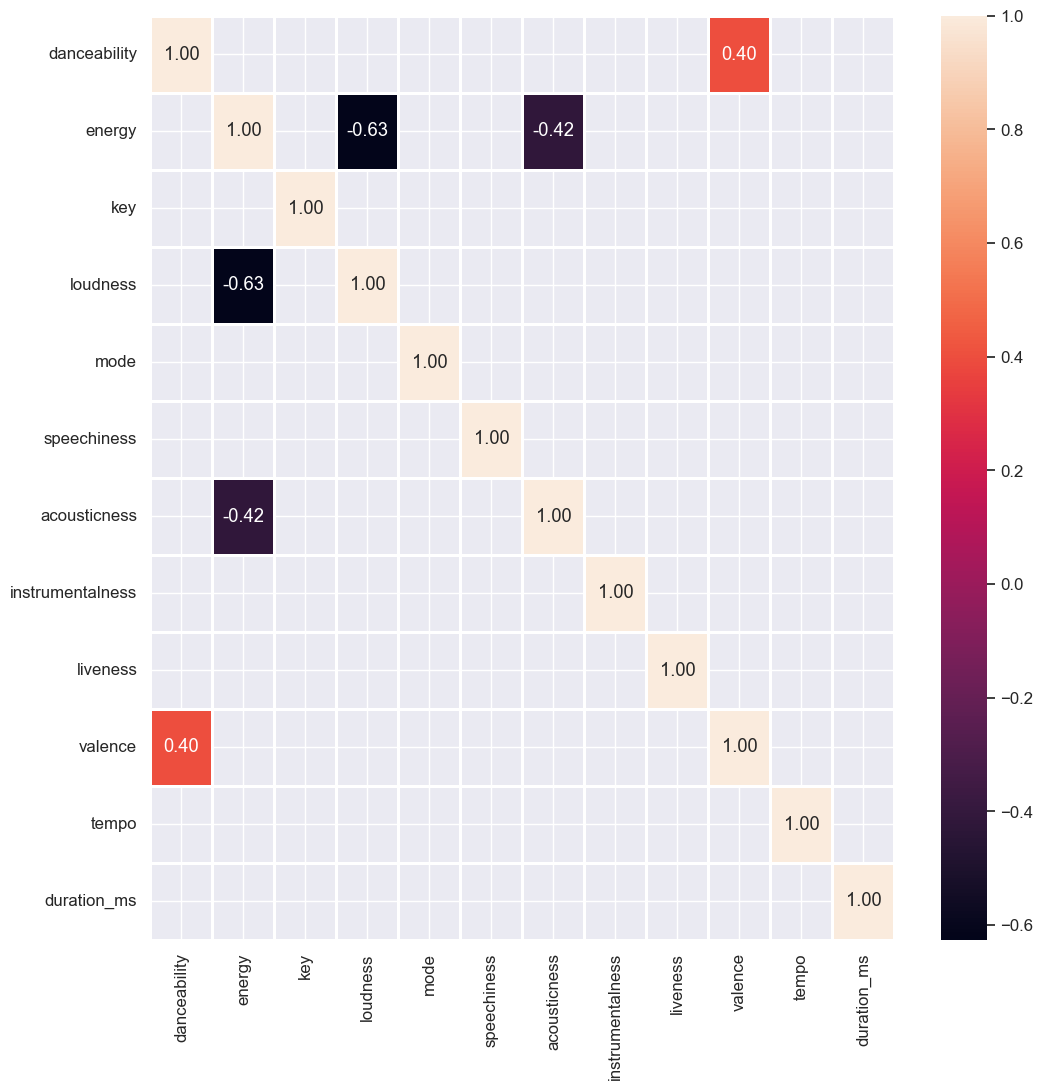

In [184]:
# We define the values of the correlation matrix calculating the correlation between each variable using .corr() function 

corr_matrix = standarized_variables.corr()

# We plot the correlation matrix and defined the value of 0.4 as the threshold for high correlation between variables
high_corr = corr_matrix[abs(corr_matrix) > 0.4]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

Our objective in this step is to avoid multicolinearity, so we drop the variables 'energy' and 'valence' because it has high correlation with the variables 'loudness' and 'acousticness'

In [185]:
standarized_variables = standarized_variables.drop(columns = ['valence', 'energy'])
standarized_variables.head()

,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms
0,-0.488070,0.186530,1.974947,0.814478,-0.843737,1.892879,-0.182978,-0.082042,-0.862795,-0.577737
1,0.409162,1.009624,1.190690,0.814478,-0.808497,-0.435615,0.126759,-0.782324,0.111049,1.490671
2,0.916613,-1.459658,-1.518560,0.814478,1.986823,-0.741311,-0.182600,-0.800778,0.295926,-1.113114
3,0.975448,0.186530,0.406433,-1.227780,-0.412042,-0.814513,-0.179405,-0.822146,0.297532,1.476608
4,-0.377754,-0.910929,0.620322,0.814478,0.564621,-0.509526,-0.182978,0.364740,1.493534,-0.452222


<Axes: >

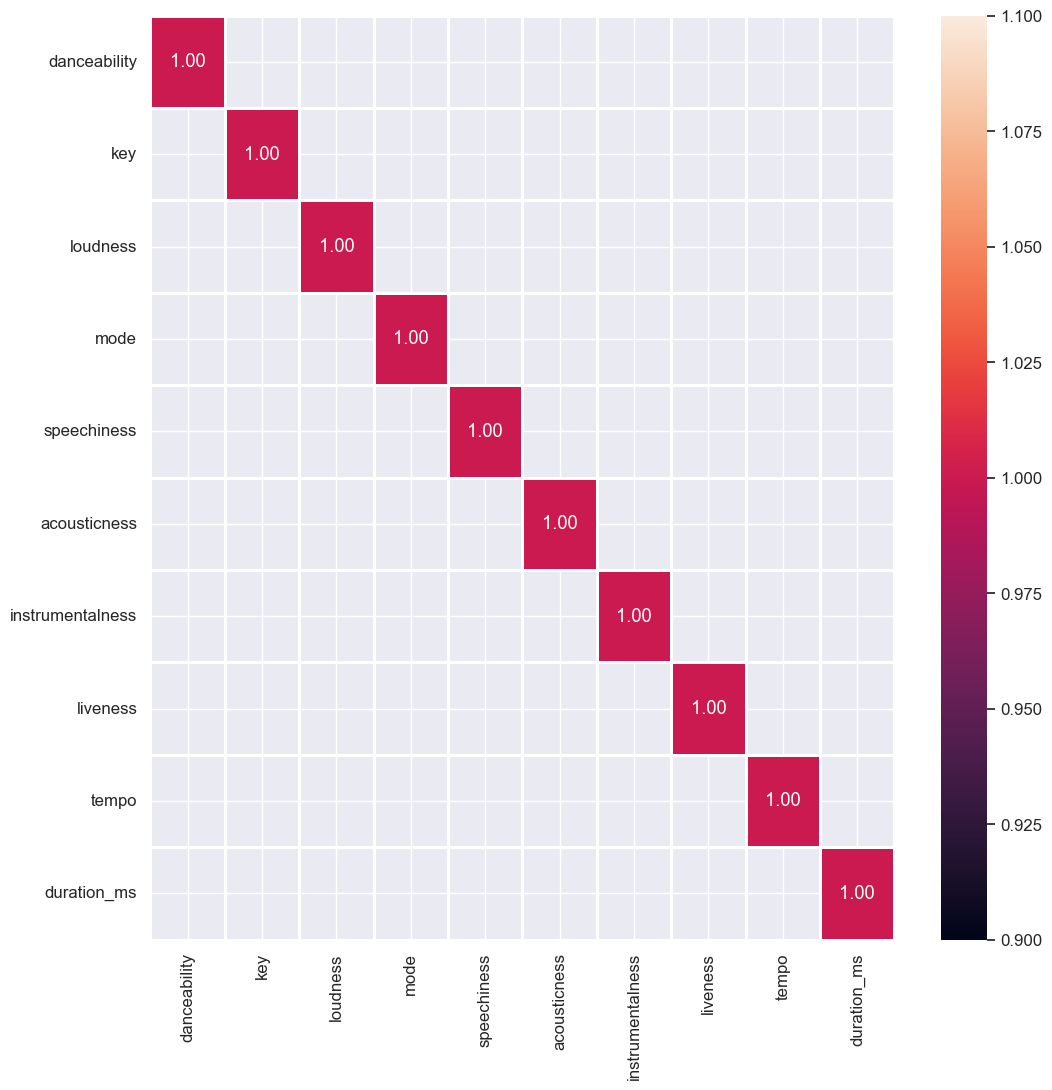

In [186]:
# Second correlation matrix after droping the high correlated variables 

corr_matrix = standarized_variables.corr()

# Again we define 0.4 as our threshold
high_corr = corr_matrix[abs(corr_matrix) > 0.4]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

### 3.5 Defining the variables for running the model

After testing multiple models, we decided to refine our final segmentation by reducing the number of variables. This decision was made to enhance the silhouette score, ensuring that the clusters are well-defined and meaningfully separated. By focusing on speechiness, accousticness, instrumentalness, and liveness, we prioritized features that best capture the distinct characteristics of different types of tracks. These variables effectively differentiate between spoken-word content, acoustic and instrumental compositions, and live performances—key factors in clustering songs with similar auditory profiles. This reduction helped improve cluster cohesion and separation, leading to a more interpretable and robust segmentation.

In [187]:
standarized_variables = standarized_variables.drop(columns = ['loudness', 'danceability', 'key', 'mode', 'tempo', 'duration_ms'])
standarized_variables.head()

,speechiness,acousticness,instrumentalness,liveness
0,-0.843737,1.892879,-0.182978,-0.082042
1,-0.808497,-0.435615,0.126759,-0.782324
2,1.986823,-0.741311,-0.182600,-0.800778
3,-0.412042,-0.814513,-0.179405,-0.822146
4,0.564621,-0.509526,-0.182978,0.364740


<Axes: >

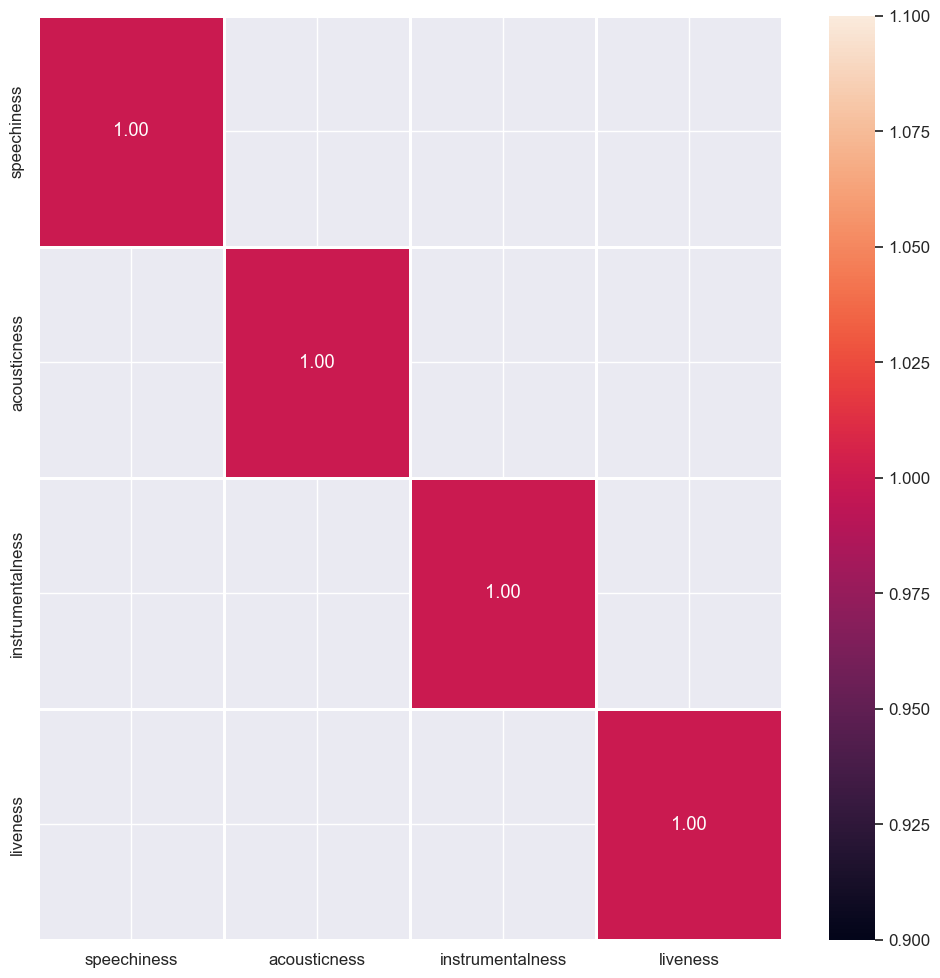

In [188]:
# We run again the correlation matrix for our final variables

corr_matrix = standarized_variables.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.4]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

In [189]:
# Finally, we merged the standarized variables with the songs in order assign a cluster for each song

df_merge = songs.merge(standarized_variables, left_index=True, right_index=True)
df_merge.drop(columns= ['index'], inplace=True)

# Output: Dataframe with standarized values and songs
df_merge

,track_name,year,speechiness,acousticness,instrumentalness,liveness
0,True,2005,-0.843737,1.892879,-0.182978,-0.082042
1,1973,2007,-0.808497,-0.435615,0.126759,-0.782324
2,#SELFIE,2014,1.986823,-0.741311,-0.182600,-0.800778
3,#thatPOWER,2013,-0.412042,-0.814513,-0.179405,-0.822146
4,",,,Ready For It?",2017,0.564621,-0.509526,-0.182978,0.364740
...,...,...,...,...,...,...
2016,test drive,2021,-0.575658,-0.672722,-0.182978,-0.344283
2017,thank u; next,2019,-0.318907,0.532915,-0.182978,-0.567674
2018,traitor,2021,-0.721654,3.264668,-0.182978,-0.383134
2019,traitor,2022,-0.721654,3.264668,-0.182978,-0.383134


### 3.6 K-means algorithms

In [190]:
# We separate again the variables from the songs, in order to run the K-means algorithm
df_cleaned = df_merge.iloc[:,2:]
df_cleaned

,speechiness,acousticness,instrumentalness,liveness
0,-0.843737,1.892879,-0.182978,-0.082042
1,-0.808497,-0.435615,0.126759,-0.782324
2,1.986823,-0.741311,-0.182600,-0.800778
3,-0.412042,-0.814513,-0.179405,-0.822146
4,0.564621,-0.509526,-0.182978,0.364740
...,...,...,...,...
2016,-0.575658,-0.672722,-0.182978,-0.344283
2017,-0.318907,0.532915,-0.182978,-0.567674
2018,-0.721654,3.264668,-0.182978,-0.383134
2019,-0.721654,3.264668,-0.182978,-0.383134


### 3.6.1 Elbow Method

The Elbow Method was used to identify the optimal number of clusters, ensuring a balance between compactness and meaningful segmentation. This approach allowed us to avoid overfitting with too many clusters while preventing underfitting with too few.

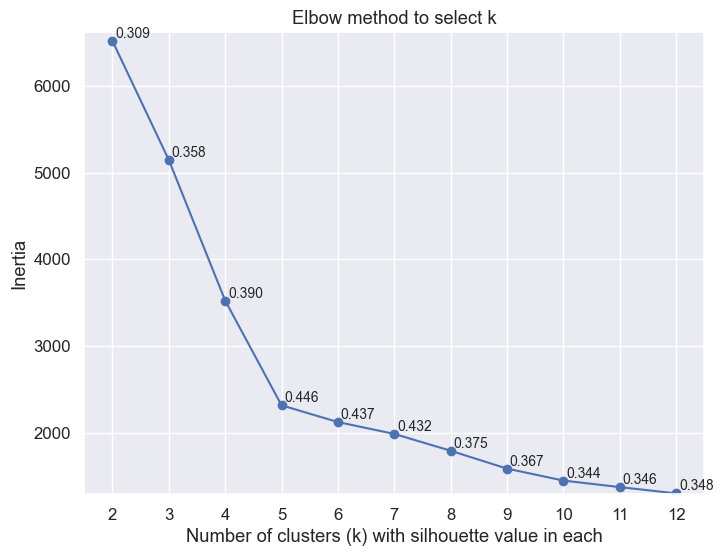

In [191]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia = []
silhouettes = []

for n_clusters in k:
    # Initialize the cluster with n_clusters value and a random generator seed of 10 for reproducibility.
    cluster = KMeans(n_clusters=n_clusters, random_state=500)
    cluster_labels = cluster.fit_predict(df_cleaned)
    inertia.append(cluster.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_cleaned, cluster_labels)
    silhouettes.append("{:.3f}".format(silhouette_avg))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_cleaned, cluster_labels)


plt.figure(figsize=(8, 6))
plt.plot(k, inertia, marker='o')

for i, txt in enumerate(silhouettes):
    plt.text(k[i]+0.05, inertia[i], f"{txt}", fontsize=10, ha='left', va='bottom')

plt.title("Elbow method to select k")
plt.xlabel("Number of clusters (k) with silhouette value in each")
plt.ylabel("Inertia")
plt.ylim(min(inertia) - 10, max(inertia) + 100)
plt.xticks(k)
plt.grid(True)
plt.show()

### 3.6.2 Running the K-means algorithm

In [192]:
# Apply K-Means with the optimal number of clusters (we defined this with the Elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_cleaned)

# Here we assign a cluster for each song
df_merge['cluster'] = clusters
df_seg["cluster"] = clusters

# Output: Dataframe with the clusters per song and all variables (in order to profile)
df_seg

,track_name,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,True,2005,0.598,0.400,6.0,100.0,1.0,0.0241,0.45900,0.000000,0.1510,0.3690,96.938,203546.0,4
1,1973,2007,0.720,0.668,9.0,89.0,1.0,0.0269,0.06520,0.006640,0.0789,0.7680,123.007,280027.0,1
2,#SELFIE,2014,0.789,0.916,0.0,51.0,1.0,0.2490,0.01350,0.000008,0.0770,0.6580,127.956,183750.0,0
3,#thatPOWER,2013,0.797,0.608,6.0,78.0,0.0,0.0584,0.00112,0.000077,0.0748,0.4020,127.999,279507.0,1
4,",,,Ready For It?",2017,0.613,0.764,2.0,81.0,1.0,0.1360,0.05270,0.000000,0.1970,0.4170,160.015,208187.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,test drive,2021,0.698,0.708,9.0,69.0,0.0,0.0454,0.02510,0.000000,0.1240,0.3220,115.036,122174.0,1
2292,thank u; next,2019,0.717,0.653,1.0,75.0,1.0,0.0658,0.22900,0.000000,0.1010,0.4120,106.966,207320.0,1
2293,traitor,2021,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0,4
2294,traitor,2022,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,0.1200,0.0849,100.607,229227.0,4


### 3.6.3 Songs per clusters

In [193]:
clustersizes = df_merge.groupby('cluster')['track_name'].count().reset_index()
clustersizes

,cluster,track_name
0,0,283
1,1,996
2,2,388
3,3,38
4,4,316


### 3.7 Silhouette Score and Inertia

In [194]:
# Defining the variables to calculate the Silhouette and Inertia

df_cleaned_without_clusters = df_merge.iloc[:,2:-1]

# Calculating Silhouette
group_column = df_merge["cluster"]
silhouette_avg = silhouette_score(df_cleaned_without_clusters, group_column)

# Inertia does not exist in scikit, we calculate it apart
centroids = np.array([df_cleaned_without_clusters[group_column == i].mean(axis=0) for i in range(n_clusters)])
inertia = sum(
    np.sum(np.linalg.norm(df_cleaned_without_clusters[group_column == i] - centroids[i], axis=1)**2)
    for i in range(n_clusters)
)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {inertia:.3f}")

Silhouette Score: 0.446
Inertia: 2314.231


### 3.8 Mean popularity per cluster

We try to determine if the popularity was related with a defined cluster

In [195]:
# Here we assign the cluster in the main dataframe

df_final = df_final.merge(df_seg, on = ['track_name','year', 'danceability', 'acousticness', 'loudness', 'energy', 'key', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'], how = 'left')

# Here we assign the mean popularity score for each value depending on the define cluster
df_final['mean_popularity'] = df_final.groupby('cluster')['track_popularity'].transform('mean')

# Output: Main Dataframe with clusters and mean popularity
df_final

,track_name,album,artist_name,year,track_popularity,artist_genres,artist_popularity,danceability,energy,key,...,latin,metal,pop,rap,reggae,rnb_soul,rock,world,cluster,mean_popularity
0,True,"Take It All Away (U,S, Version)",Ryan Cabrera,2005,63,"[idol, neo mellow]",43,0.598,0.400,6.0,...,0,0,1,0,0,0,0,0,4,73.481013
1,1973,All the Lost Souls,James Blunt,2007,72,"[neo mellow, pop rock]",69,0.720,0.668,9.0,...,0,0,0,0,0,0,1,0,1,72.338353
2,#SELFIE,#SELFIE,The Chainsmokers,2014,65,"[electropop, pop]",78,0.789,0.916,0.0,...,0,0,1,0,0,0,0,0,0,71.003534
3,#thatPOWER,#willpower (Deluxe),"will,i,am",2013,68,"[dance pop, pop]",71,0.797,0.608,6.0,...,0,0,1,0,0,0,0,0,1,72.338353
4,",,,Ready For It?",reputation,Taylor Swift,2017,85,[pop],100,0.613,0.764,2.0,...,0,0,1,0,0,0,0,0,1,72.338353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,test drive,Positions (Deluxe),Ariana Grande,2021,65,[pop],87,0.698,0.708,9.0,...,0,0,1,0,0,0,0,0,1,72.338353
2017,thank u; next,thank u; next,Ariana Grande,2019,82,[pop],87,0.717,0.653,1.0,...,0,0,1,0,0,0,0,0,1,72.338353
2018,traitor,SOUR,Olivia Rodrigo,2021,88,[pop],85,0.380,0.339,3.0,...,0,0,1,0,0,0,0,0,4,73.481013
2019,traitor,SOUR,Olivia Rodrigo,2022,88,[pop],85,0.380,0.339,3.0,...,0,0,1,0,0,0,0,0,4,73.481013


In [196]:
# Calculate the mean popularity for each cluster
df_final.groupby('cluster')['track_popularity'].mean().sort_values(ascending = False)


cluster
4    73.481013
1    72.338353
2    71.340206
0    71.003534
3    70.210526
Name: track_popularity, dtype: float64

Based on these results, we cannot conclude that there is a significant relationship between a song's popularity and its attributes related to speechiness, acousticness, instrumentalness, and liveness. Non of the clusters show a clear pattern or correlation that would indicate these features directly influence a track's popularity.

### 3.9 Profiling

To describe the identified clusters, we utilized all the remaining variables to generate a comprehensive and meaningful characterization of each group.

In [197]:
# Here, we create a dataframe with all the descriptive variables

variables_for_profiling= df_final[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
only_clusters = df_final[['cluster']]
scaler = StandardScaler()
variables_for_profiling_standard = pd.DataFrame(scaler.fit_transform(variables_for_profiling), columns=variables_for_profiling.columns)

index = variables_for_profiling_standard.index
profile_variables = variables_for_profiling_standard.merge(only_clusters, on=index)

profile_variables.drop(columns= 'key_0', inplace = True)

profile_variables

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,-0.997734,-2.496958,-0.488070,-2.044393,0.186530,1.974947,0.814478,-0.843737,1.892879,-0.182978,-0.082042,-0.772993,-0.862795,-0.577737,4
1,-0.010798,-0.323356,0.409162,-0.247594,1.009624,1.190690,0.814478,-0.808497,-0.435615,0.126759,-0.782324,1.001993,0.111049,1.490671,1
2,-0.778415,0.429045,0.916613,1.415115,-1.459658,-1.518560,0.814478,1.986823,-0.741311,-0.182600,-0.800778,0.512648,0.295926,-1.113114,0
3,-0.449436,-0.156156,0.975448,-0.649863,0.186530,0.406433,-1.227780,-0.412042,-0.814513,-0.179405,-0.822146,-0.626190,0.297532,1.476608,1
4,1.414777,2.268247,-0.377754,0.396035,-0.910929,0.620322,0.814478,0.564621,-0.509526,-0.182978,0.364740,-0.559461,1.493534,-0.452222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,-0.778415,1.181446,0.247366,0.020584,1.009624,-0.235231,-1.227780,-0.575658,-0.672722,-0.182978,-0.344283,-0.982076,-0.186719,-2.778421,1
2017,1.085798,1.181446,0.387099,-0.348162,-1.185294,0.192545,0.814478,-0.318907,0.532915,-0.182978,-0.567674,-0.581704,-0.488185,-0.475670,1
2018,1.743756,1.014246,-2.091321,-2.453366,-0.636564,1.190690,0.814478,-0.721654,3.264668,-0.182978,-0.383134,-2.036836,-0.725734,0.116799,4
2019,1.743756,1.014246,-2.091321,-2.453366,-0.636564,1.190690,0.814478,-0.721654,3.264668,-0.182978,-0.383134,-2.036836,-0.725734,0.116799,4


In [198]:
# df_prof will store cluster averages to calculate profile and global metrics
df_prof2 = profile_variables
df_prof2 = profile_variables.groupby("cluster").mean().transpose()
df_prof2["Average"] = df_prof2.mean(axis=1)
df_prof2["Std.dev"] = df_prof2.std(axis=1)
df_prof2

cluster,0,1,2,3,4,Average,Std.dev
track_popularity,-0.120070,0.026306,-0.083150,-0.207031,0.151609,-0.046467,0.124156
artist_popularity,0.147523,-0.012122,-0.134609,-0.096755,0.083004,-0.002592,0.106063
danceability,0.331071,-0.028695,-0.111443,0.199370,-0.093192,0.059422,0.175288
energy,-0.072686,0.119314,0.355877,0.060811,-0.755246,-0.058386,0.375025
key,0.110910,-0.008225,-0.099149,0.193750,0.025037,0.044465,0.100478
loudness,0.145686,-0.103305,-0.205463,0.406433,0.398537,0.128378,0.251287
mode,-0.159744,0.012748,0.009155,0.008323,0.090640,-0.007776,0.082155
speechiness,2.088933,-0.379798,-0.199156,-0.056757,-0.422342,0.206176,0.950432
acousticness,-0.049152,-0.427495,-0.354539,-0.194289,1.850123,0.164930,0.852708
instrumentalness,-0.158267,-0.114320,-0.102514,6.578522,-0.163152,1.208054,2.685339


Finally we define a label for each cluster

In [199]:
profiling = pd.DataFrame({'Cluster 0' : ['Energetic and Talkative Party Tracks'],
                           'Cluster 1' : ['Balanced and Versatile Mainstream Music'],
                           'Cluster 2' : ['High-Energy but Niche and Undiscovered'],
                           'Cluster 3' : ['Loud, Instrumental, and Powerful Soundscapes'],
                           'Cluster 4' : ['Acoustic, Emotional, and Introspective Melodies']})

profiling = profiling.T
profiling.rename(columns={0 : 'Description'}, inplace= True)
profiling

,Description
Cluster 0,Energetic and Talkative Party Tracks
Cluster 1,Balanced and Versatile Mainstream Music
Cluster 2,High-Energy but Niche and Undiscovered
Cluster 3,"Loud, Instrumental, and Powerful Soundscapes"
Cluster 4,"Acoustic, Emotional, and Introspective Melodies"


## 4. Linear Regression

In this project, Linear Regression was used to analyze the relationship between a track’s attributes and its popularity. By setting track_popularity as the dependent variable, we aimed to determine how different audio features contribute to a song’s overall success. This model estimates the impact of each variable by fitting a linear equation to the data, helping us understand whether specific characteristics have a significant influence on popularity.

In [200]:
# We define the variables for our linear regression
df_lr = df_final.drop(columns= ['track_name', 'album', 'artist_name', 'year','artist_genres', 'mean_popularity', 'cluster', 'super_genres'])

# We set our dependent variable "track_popularity"
target = "track_popularity"

# And the independent variales
independent_variables = df_lr.iloc[:,1:]

df_lr

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,hiphop,jazz_blues,latin,metal,pop,rap,reggae,rnb_soul,rock,world
0,63,43,0.598,0.400,6.0,100.0,1.0,0.0241,0.45900,0.000000,...,0,0,0,0,1,0,0,0,0,0
1,72,69,0.720,0.668,9.0,89.0,1.0,0.0269,0.06520,0.006640,...,0,0,0,0,0,0,0,0,1,0
2,65,78,0.789,0.916,0.0,51.0,1.0,0.2490,0.01350,0.000008,...,0,0,0,0,1,0,0,0,0,0
3,68,71,0.797,0.608,6.0,78.0,0.0,0.0584,0.00112,0.000077,...,0,0,0,0,1,0,0,0,0,0
4,85,100,0.613,0.764,2.0,81.0,1.0,0.1360,0.05270,0.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,65,87,0.698,0.708,9.0,69.0,0.0,0.0454,0.02510,0.000000,...,0,0,0,0,1,0,0,0,0,0
2017,82,87,0.717,0.653,1.0,75.0,1.0,0.0658,0.22900,0.000000,...,0,0,0,0,1,0,0,0,0,0
2018,88,85,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,...,0,0,0,0,1,0,0,0,0,0
2019,88,85,0.380,0.339,3.0,89.0,1.0,0.0338,0.69100,0.000000,...,0,0,0,0,1,0,0,0,0,0


### 4.1 Searching for correlation between independent variables (to avoid multicolinearity)

<Axes: >

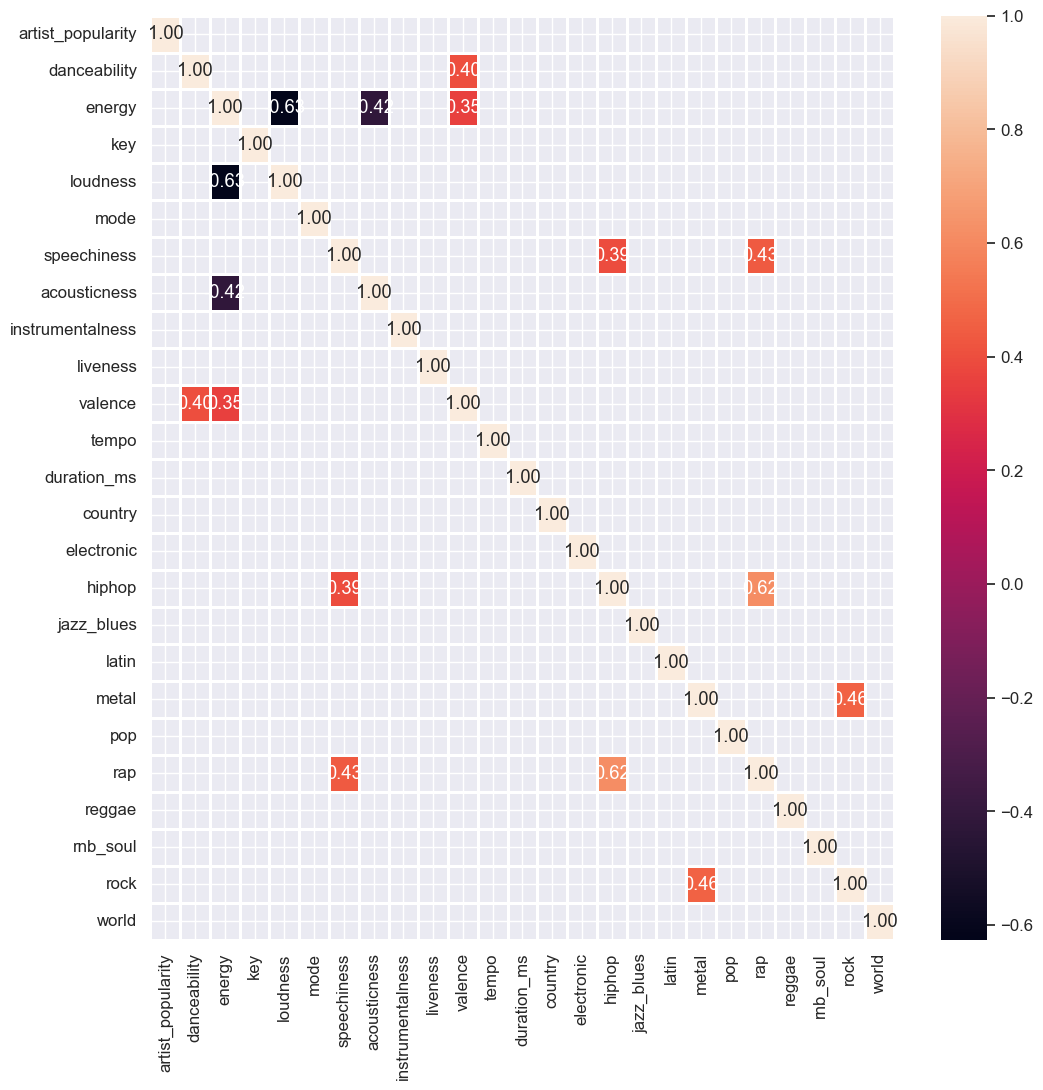

In [201]:
# Plotting correlation matrix and setting the value 0.33 as the threshold to define high correlation between variables
corr_matrix = independent_variables.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.33]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

Since we want to avoid multicolinearity, we'll drop the variables 'energy' and 'hiphop', 'energy', 'valence', 'metal', 'rap'.

In [202]:
independent_variables = independent_variables.drop(columns=['hiphop', 'energy', 'valence', 'metal', 'rap'])

<Axes: >

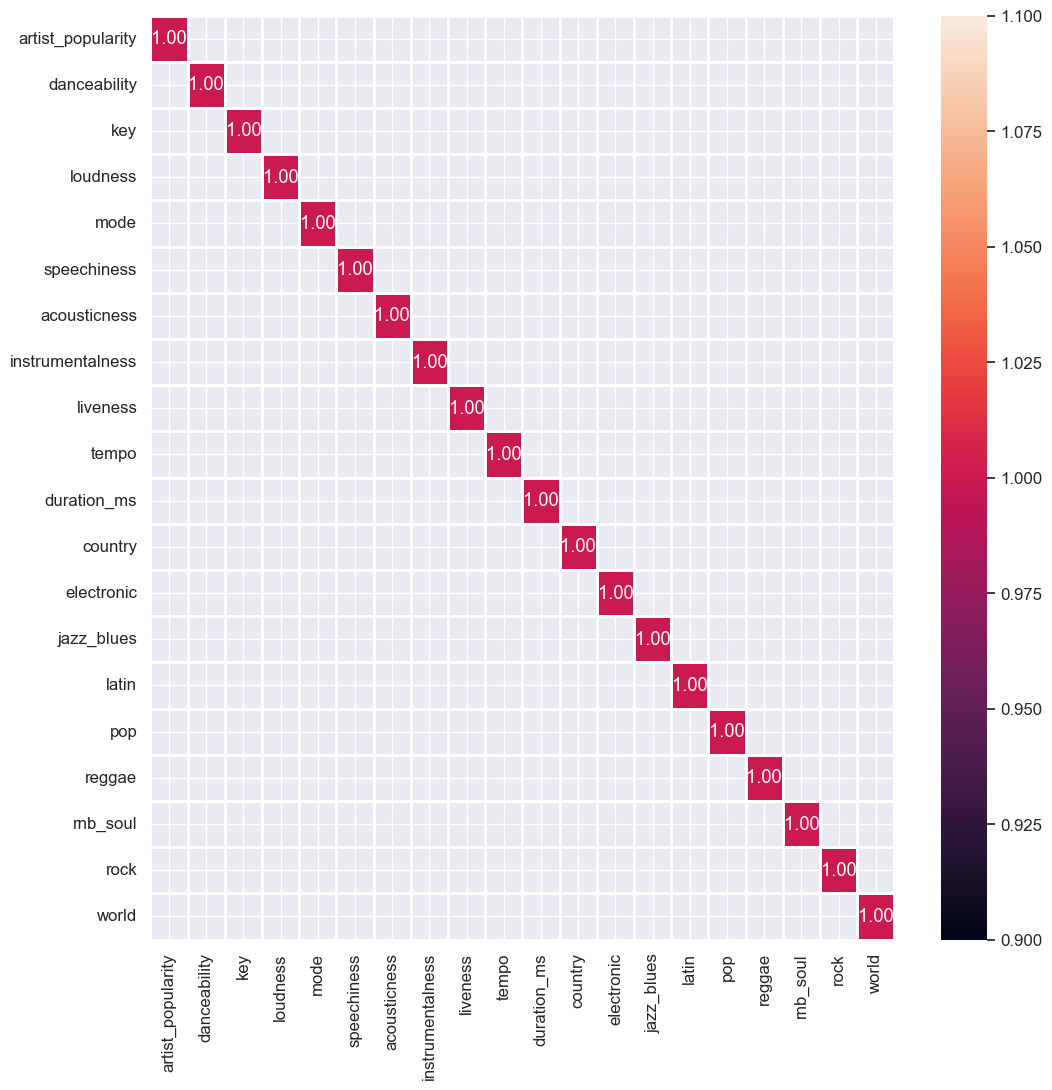

In [203]:
# We run a new correlation matrix
corr_matrix = independent_variables.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.33]

fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

### 4.2 Testing and normalizing in the independent variables

Checking for normality in the independent variables is crucial in this project because Linear Regression assumes that the independent variables are normally distributed to avoid skewed residuals, inaccurate coefficient estimates, and reduced model interpretability.

Dropping variables that do not follow a normal distribution (or applying transformations to normalize them) helps maintain the integrity of the regression model.

In [204]:
# Here we define the metric variables of the dataset

other_variables = ['danceability', 'loudness', 
       'speechiness', 'acousticness', 'liveness', 'tempo',
       'duration_ms']


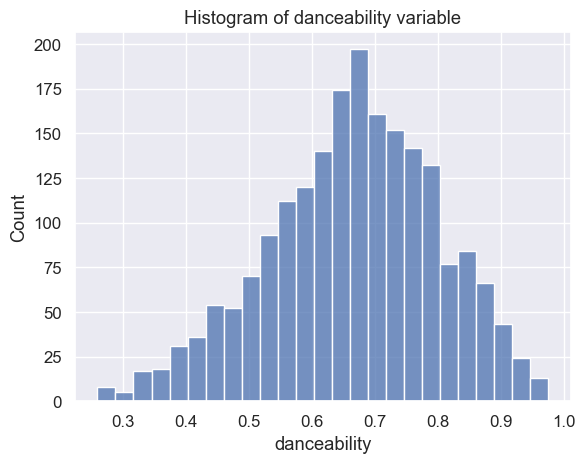

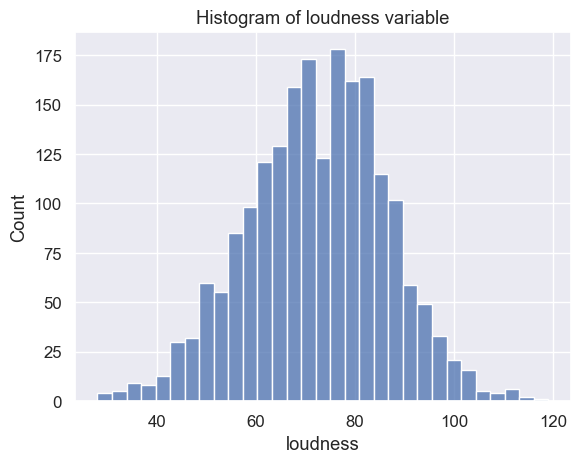

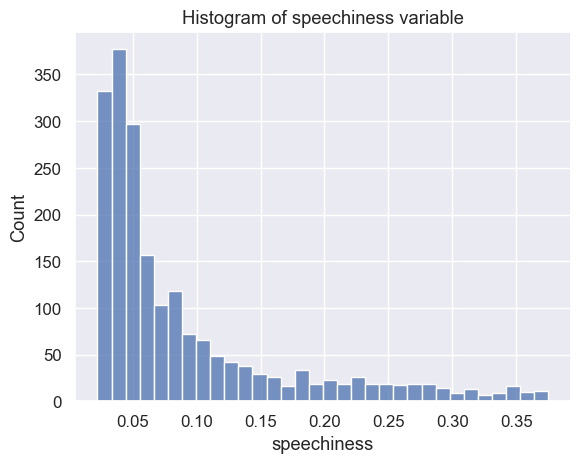

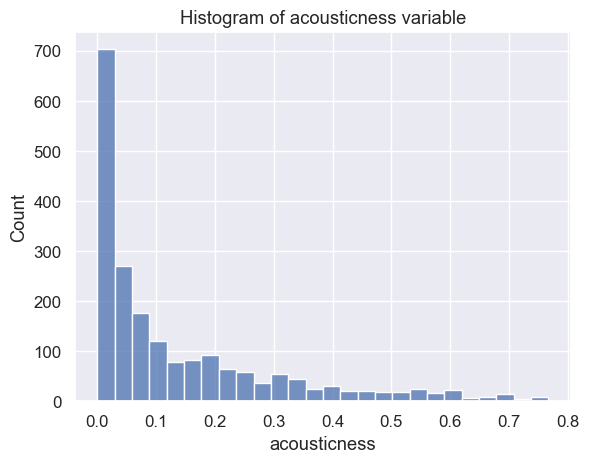

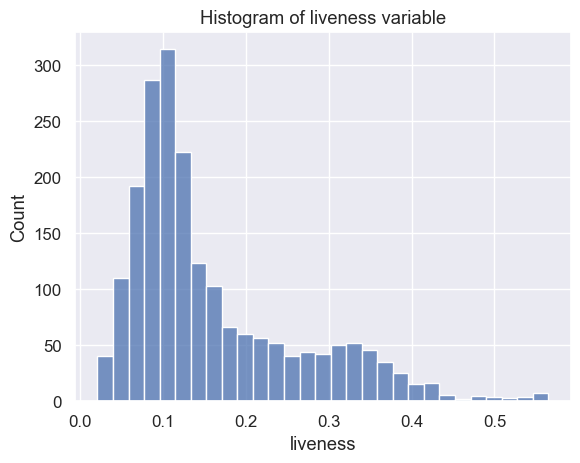

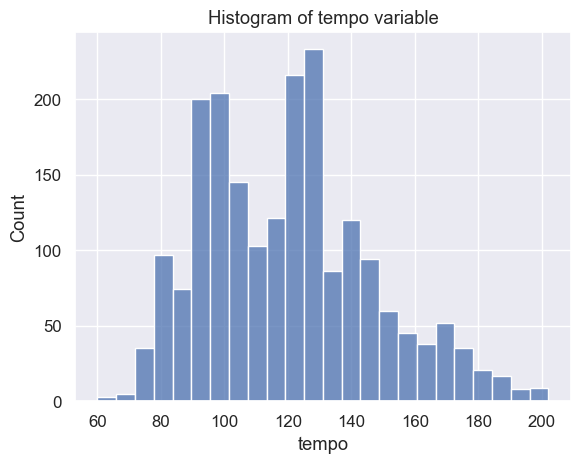

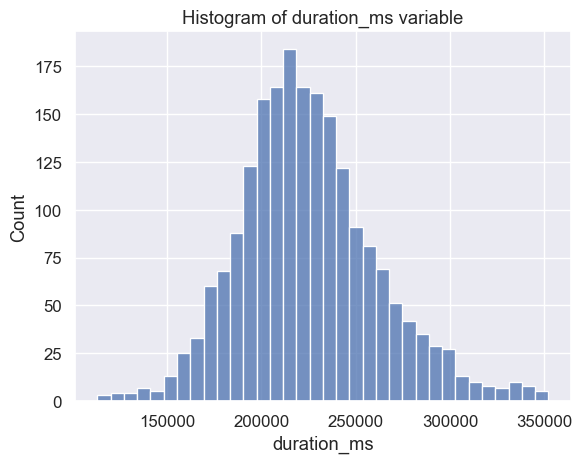

In [205]:
# In order to check normal distribution we plot a histogram for each of the metric variables

for variable in other_variables:
    plt.figure()
    sns.histplot(df_lr[variable]).set(title=f'Histogram of {variable} variable')
    plt.show()

[Text(0.5, 1.0, 'Histogram of track_popularity variable')]

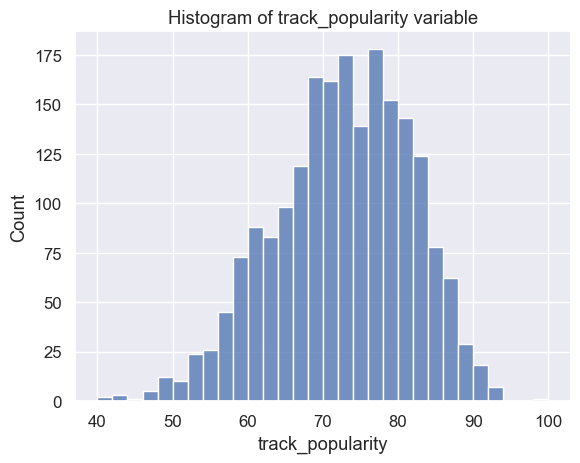

In [206]:
# Histogram of dependent variable
target = "track_popularity"
sns.histplot(df_lr[target]).set(title='Histogram of track_popularity variable')


Reviewing the plot of each metric variable, we recognize that 'speechiness', 'acousticness', 'liveness' and 'tempo' do not follow normal distribution, so we use a logarithmic transformation to check normality

In [207]:
# We use the function .log() to define the logarithmic transformation of the variables and save them in the dataframe

df_lr['lnspeechiness'] = np.log(df_final['speechiness'])
df_lr['lnacousticness'] = np.log(df_final['acousticness'])
df_lr['lnliveness'] = np.log(df_final['liveness'])
df_lr['lntempo'] = np.log(df_final['tempo'])

# Output: Dataframe with logarithmic variables
df_lr.head()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,pop,rap,reggae,rnb_soul,rock,world,lnspeechiness,lnacousticness,lnliveness,lntempo
0,63,43,0.598,0.400,6.0,100.0,1.0,0.0241,0.45900,0.000000,...,1,0,0,0,0,0,-3.725543,-0.778705,-1.890475,4.574072
1,72,69,0.720,0.668,9.0,89.0,1.0,0.0269,0.06520,0.006640,...,0,0,0,0,1,0,-3.615629,-2.730296,-2.539574,4.812241
2,65,78,0.789,0.916,0.0,51.0,1.0,0.2490,0.01350,0.000008,...,1,0,0,0,0,0,-1.390302,-4.305066,-2.563950,4.851686
3,68,71,0.797,0.608,6.0,78.0,0.0,0.0584,0.00112,0.000077,...,1,0,0,0,0,0,-2.840439,-6.794427,-2.592937,4.852022
4,85,100,0.613,0.764,2.0,81.0,1.0,0.1360,0.05270,0.000000,...,1,0,0,0,0,0,-1.995100,-2.943140,-1.624552,5.075268


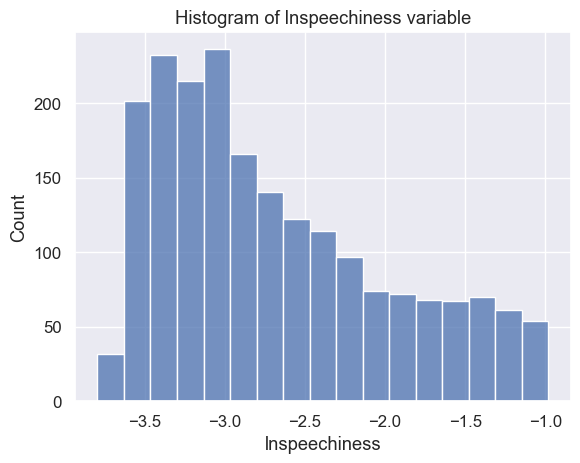

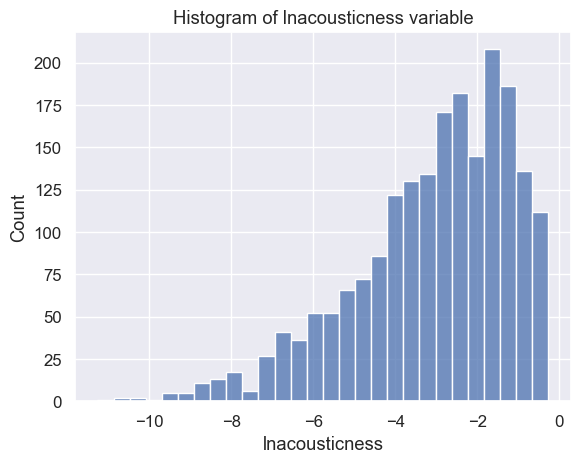

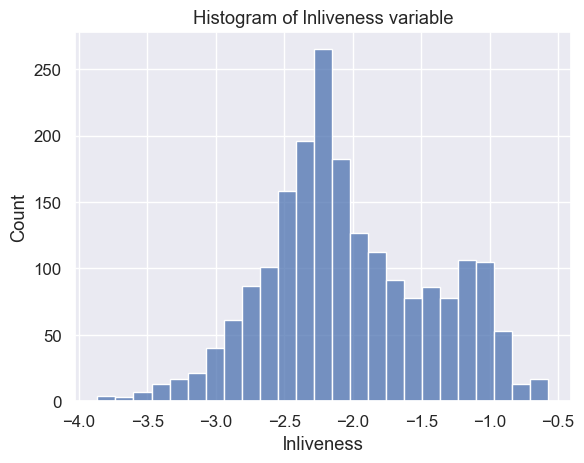

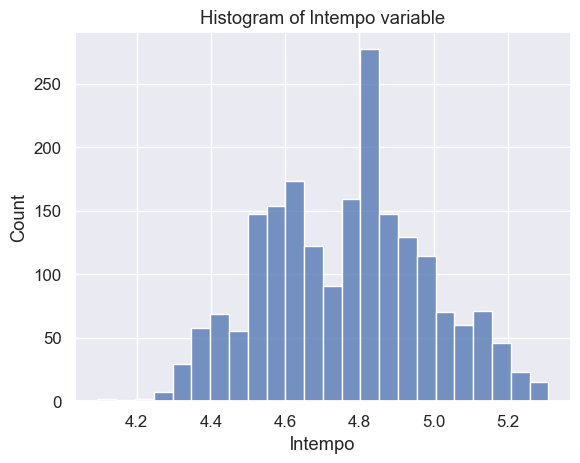

In [208]:
# We check normal distribution by plotting the histogram for the logarithmic variables

log_variables = ['lnspeechiness', 'lnacousticness', 'lnliveness', 'lntempo']

for variable in log_variables:
    plt.figure()
    sns.histplot(df_lr[variable]).set(title=f'Histogram of {variable} variable')
    plt.show()

After reviewing all the histograms we drop all the variables that do not follow normal distribution

In [209]:
df_lr = df_lr.drop(columns=['key', 'speechiness', 'acousticness', 'liveness', 'tempo', 'lnspeechiness', 'lnacousticness', 'lntempo', 'lnliveness' ])
df_lr.columns

Index(['track_popularity', 'artist_popularity', 'danceability', 'energy',
       'loudness', 'mode', 'instrumentalness', 'valence', 'duration_ms',
       'country', 'electronic', 'hiphop', 'jazz_blues', 'latin', 'metal',
       'pop', 'rap', 'reggae', 'rnb_soul', 'rock', 'world'],
      dtype='object')

### 4.3 Defining datasets for training and testing the linear regression model


In [210]:
# Firts we set the the amount of songs for the test and the train of the model using the function train_test_split from the sklearn.model_selection library
# We define 90% of the data for the model and we will reserve 10% of the data for an additional predictive test.

df_model, df_reserved = train_test_split(df_lr, test_size=0.1, random_state=42)
print ("Sample size dataset reserved for prediction: ", df_reserved.shape[0], "records")

# Here we define the dependent variable (track_popularity)
y = df_model[target]


Sample size dataset reserved for prediction:  203 records


In [211]:
# Here we define the datasets for the training and the testing of the model

X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2)
print ("Sample size train dataset: ", X_train.shape)
print ("Sample size test dataset: ", X_test.shape)

Sample size train dataset:  (1454, 21)
Sample size test dataset:  (364, 21)


### 4.4 Stepwise to select the variables of the model that are relevant (in order to avoid redundancy in the dataset)

With the stepwise function we will run a t-student-test for each predictor variable in order to check its relevance on the dependent variable. Through the p-value of the test we can check the null hypothesis, which is that the coeficcient of the predictor variable is equal to 0 (β = 0).
Our confidence level will be 95%, which means that if the p-value is lower than our theshhold (0.5) we can reject the null hypothesis and can confirm that the coeficcient β is not equal to 0.

In [212]:
# Defining Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.5, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.4}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.4}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [213]:
# Here we removed some variables: target
# We will call X_train2 to this dataframe

irrelevant_columns = [target]
X_train2=X_train.drop(columns=irrelevant_columns)
   
X_train2

,artist_popularity,danceability,energy,loudness,mode,instrumentalness,valence,duration_ms,country,electronic,hiphop,jazz_blues,latin,metal,pop,rap,reggae,rnb_soul,rock,world
819,54,0.606,0.497,82.0,1.0,0.000000,0.362,222773.0,1,0,0,0,0,0,0,0,0,0,0,0
449,71,0.765,0.837,49.0,0.0,0.000011,0.721,195973.0,0,0,0,0,0,0,1,0,0,0,1,0
753,57,0.385,0.443,98.0,0.0,0.000000,0.275,294533.0,1,0,0,0,0,0,0,0,0,0,0,0
1789,58,0.521,0.702,71.0,1.0,0.000000,0.250,242840.0,0,0,0,0,0,0,1,0,0,0,1,0
203,70,0.531,0.843,40.0,0.0,0.000000,0.392,240133.0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,79,0.534,0.870,48.0,0.0,0.000000,0.462,215160.0,0,0,0,0,0,0,1,0,0,0,0,0
163,79,0.459,0.575,68.0,1.0,0.000000,0.183,215107.0,0,0,0,0,0,0,1,0,0,0,0,0
1876,41,0.421,0.728,75.0,1.0,0.000000,0.311,244667.0,0,0,0,0,0,0,1,0,0,0,0,0
26,84,0.364,0.752,73.0,1.0,0.000000,0.606,248587.0,0,0,1,0,0,0,0,1,0,0,0,0


In [214]:
# Now we run the stepwise function

result = stepwise_selection(X_train2, y_train)
print('resulting features:')
print(result)

Add  artist_popularity              with p-value 1.028e-105
Add  duration_ms                    with p-value 1.935e-08
Add  rock                           with p-value 1.553e-08
Add  energy                         with p-value 9.363e-08
Add  rnb_soul                       with p-value 8.236e-05
Add  pop                            with p-value 0.008263
Add  loudness                       with p-value 0.01215
Add  reggae                         with p-value 0.02899
resulting features:
['artist_popularity', 'duration_ms', 'rock', 'energy', 'rnb_soul', 'pop', 'loudness', 'reggae']


In [215]:
# Here we remove the non relevant variables

X_train_stepwise=X_train2
for item in X_train2.columns:
    if item not in result:
        X_train_stepwise=X_train_stepwise.drop(labels=[item],axis=1)

### 4.5 Running the linear regression analysis

By running this analysis we will determine how the independent variables influence the dependent one. For our case, this will dictates how the dependent variables (calculated in the stepwise function) can affect the popularity of a song.

Here the R squared value describes the percentage of the variance of the dependent variable (track_popularity) can be described with the independent variables.

Also this analysis will determine the coefficients β for each independent variable

In [216]:
# We define "lm" as the result of the linear regression an determine the R squared value

lm = LinearRegression(fit_intercept=True)
model=lm.fit(X_train_stepwise, y_train)

In [217]:
# R squared value for the train dataset
print(f"R squared value is : {model.score(X_train_stepwise,y_train):.3f}")

R squared value is : 0.340


In [218]:
# coefficients β
coeff_df = pd.DataFrame(model.coef_,X_train_stepwise.columns,columns=['Coefficient'])
print("Intercept: ", lm.intercept_)
coeff_df

Intercept:  60.53735392723841


,Coefficient
artist_popularity,0.404546
energy,-10.389988
loudness,-0.044176
duration_ms,-0.000030
pop,-1.176595
reggae,5.765607
rnb_soul,-2.063900
rock,3.318222


### 4.6 Plots of the regression line of the train and test datasets

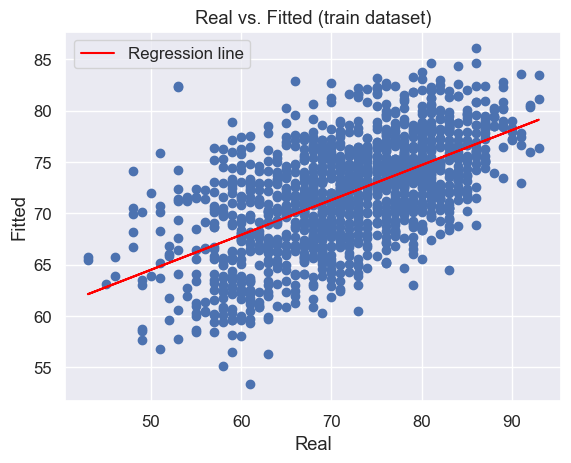

In [219]:
# Plot for train dataset
predictions_train = lm.predict(X_train[X_train_stepwise.columns])

plt.title("Real vs. Fitted (train dataset)")
plt.scatter(y_train,predictions_train)

coef = np.polyfit(y_train, predictions_train, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y, poly1d_fn(y), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")
plt.legend()
plt.show()

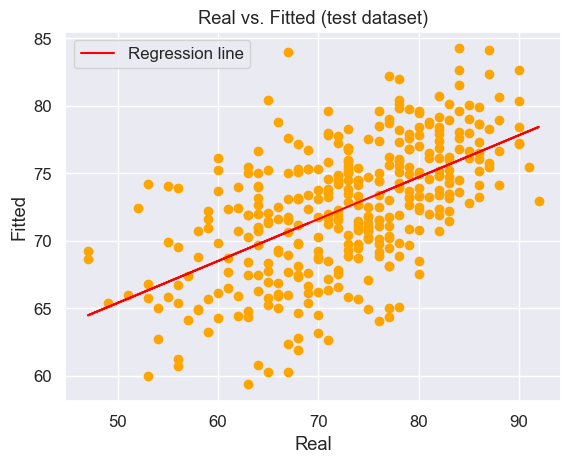

In [220]:
# Plot for test dataset
predictions_test = lm.predict(X_test[X_train_stepwise.columns]) #only with the columns used in the model
plt.title("Real vs. Fitted (test dataset)")
plt.scatter(y_test,predictions_test, color="orange")

coef = np.polyfit(y_test, predictions_test, 1)  
poly1d_fn = np.poly1d(coef)  
plt.plot(y_test, poly1d_fn(y_test), color="red", label="Regression line")

plt.xlabel("Real")
plt.ylabel("Fitted")

plt.legend()
plt.show()

### 4.7 Checking for Homoscedasticity (normality in the residuals / error)

To assess the reliability of the t-test, we verified that the residuals (errors between the observed and predicted values) remain consistent. We plotted histograms of the residuals for both the training and test datasets to examine this assumption. The results show that the residuals follow a normal distribution, which supports the validity of the t-test and confirms that the model exhibits homoscedasticity.

[Text(0.5, 1.0, 'Histogram of Residuals - train dataset')]

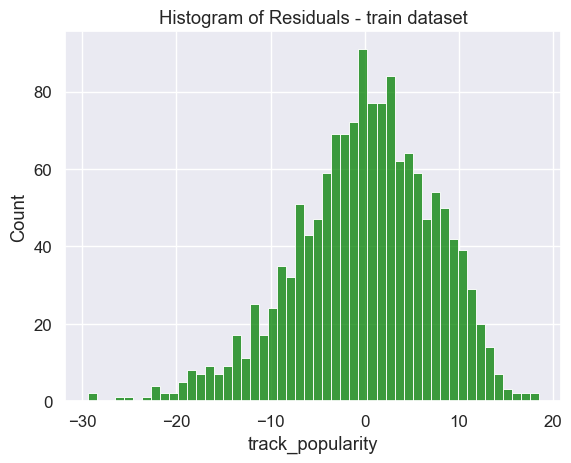

In [221]:
# Histogram training dataset
sns.histplot((y_train-predictions_train),bins=50, color="green").set(title='Histogram of Residuals - train dataset')

[Text(0.5, 1.0, 'Histogram of dependent - test dataset')]

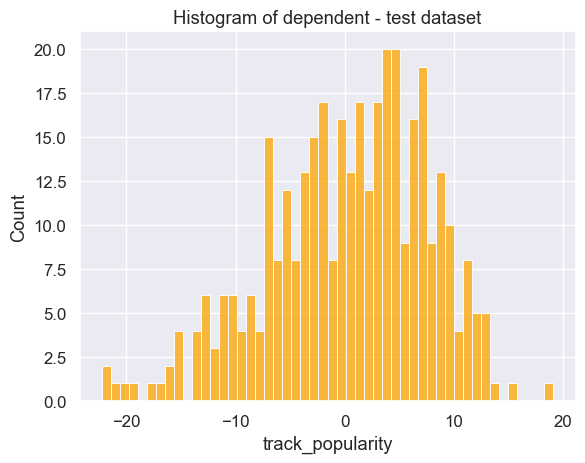

In [222]:
# Histogram test dataset
sns.histplot((y_test-predictions_test),bins=50, color="orange").set(title='Histogram of dependent - test dataset')

### 4.8 Evaluating the performance of the model

In order to know how reliable is our model we calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE%) for the training, test and reserved datasets.

In [223]:
# Error comparison between the two datasets
print ("Errors:\n")
results = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE %'],
    'Train': [
        metrics.mean_absolute_error(y_train, predictions_train),
        metrics.mean_squared_error(y_train, predictions_train),
        np.sqrt(metrics.mean_squared_error(y_train, predictions_train)),
        np.mean(100 * abs(y_train - predictions_train) / y_train)
    ],
    'Test': [
        metrics.mean_absolute_error(y_test, predictions_test),
        metrics.mean_squared_error(y_test, predictions_test),
        np.sqrt(metrics.mean_squared_error(y_test, predictions_test)),
        np.mean(100 * abs(y_test - predictions_test) / y_test)
    ]
}

results_df = pd.DataFrame(results)
results_df

Errors:



,Metric,Train,Test
0,MAE,5.820106,5.990845
1,MSE,54.338231,54.290092
2,RMSE,7.371447,7.368181
3,MAPE %,8.432959,8.602933


In [224]:
def store_predictions (df_final):
    df_final = df_final.copy()
    # first move target variable to the end to show it along with predictions and errors
    df_final = df_final[[col for col in df_final.columns if col !=target] + [target]]
    
    predictions = lm.predict(df_final[X_train_stepwise.columns])
    df_final.loc[:, target + "_predicted"] = predictions
    
    df_final.loc[:, "error"] = df_final[target] - df_final[target + "_predicted"]
    df_final.loc[:, "%abs error"] = abs(100*df_final["error"]) /  df_final[target]
    return df_final

In [225]:
# Saving the predictors for each dataset
X_train = store_predictions(X_train)
X_test = store_predictions(X_test)
df_reserved = store_predictions(df_reserved)


In [226]:
# Calculating the error for the reserved dataset
print ("Errors in reserved dataset:\n")

MAE_reserved = round(abs(df_reserved["error"]).mean(),2)
R2_reserved = round(model.score(X_train_stepwise,y_train),2)
MSE = np.square(df_reserved["error"]).mean()
MAPE_reserved = round(df_reserved["%abs error"].mean(),2)

print(f"MAE:, {MAE_reserved}")

print(f"R squared value is : {R2_reserved}")


print(f"MSE: {MSE:.2f}") 
print(f"RMSE: {np.sqrt(MSE):.2f}") 
print (f"MAPE %: {MAPE_reserved}") 

Errors in reserved dataset:

MAE:, 6.55
R squared value is : 0.34
MSE: 70.14
RMSE: 8.37
MAPE %: 9.76


### 4.9 Linear Regression Results

The following table summarizes the results of the linear regression, consolidating all the metrics and findings discussed earlier.

In [227]:
# model with an additional library (statmodels)
X_train_stepwise = sm.add_constant(X_train_stepwise) 
result = sm.OLS(y_train, X_train_stepwise).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     92.97
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.30e-124
Time:                        23:15:12   Log-Likelihood:                -4967.7
No. Observations:                1454   AIC:                             9953.
Df Residuals:                    1445   BIC:                         1.000e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.5374      2.84

## 5. Classification Analysis

In the classification analysis, we will use Logistic Regression to predict whether a song falls into a high or low popularity category based on its attributes. To achieve this, we will transform the track popularity variable into a binary classification, setting a threshold to distinguish between popular and less popular tracks. The model will then analyze how features influence a track’s likelihood of achieving higher popularity.

By fitting the logistic regression model, we aim to interpret the probability of a track being classified as popular based on its characteristics. This analysis will help us determine which features contribute most to popularity trends and whether certain audio attributes significantly impact a song’s success. Additionally, we will evaluate the model’s performance using metrics like Precision, Sensitivity and Specificity and the ROC curve to ensure its effectiveness in classification.

In [228]:
# Here we define as "popular" all the song with 80 point or more in track_popularity

df_final['track_popularity'] = (df_final['track_popularity'] >= 80).astype(int)  # Convert to 1 if Y >= 50, else 0

### 5.1 Defining datasets for training and testing

In [229]:
# Defining the depedent variable
target = "track_popularity"

# Firts we set the the amount of songs for the test and the train of the model using the function train_test_split from the sklearn.model_selection library
# We define 90% of the data for the model and we will reserve 10% of the data for an additional predictive test.
df_model, df_reserved = train_test_split(df_final, test_size=0.1, random_state=42)
print ("Sample size dataset reserved for prediction: ", df_reserved.shape[0], "records")

Sample size dataset reserved for prediction:  203 records


In [230]:
# Here we define the dependent variable (track_popularity)

y = df_model[target]

# Here we define the datasets for the training and the testing of the model
X_train, X_test, y_train, y_test = train_test_split(df_model, y, test_size=0.2)
print ("Sample size train dataset: ", X_train.shape)
print ("Sample size test dataset: ", X_test.shape)

Sample size train dataset:  (1454, 34)
Sample size test dataset:  (364, 34)


### 5.2 Stepwise function for Classification Analysis

In [231]:
# Defining Stepwise function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [232]:
# Here we removed the irrelevant variables

# We will call X_train2 to this dataframe
irrelevant_columns = [target, 'mean_popularity', 'cluster', 'track_name', 'album', 'artist_name', 'artist_genres', 'year', 'super_genres']
X_train2=X_train.drop(columns=irrelevant_columns)

X_train2

,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,hiphop,jazz_blues,latin,metal,pop,rap,reggae,rnb_soul,rock,world
789,47,0.736,0.666,1.0,69.0,1.0,0.0337,0.05930,0.000038,0.1070,...,0,0,0,0,0,0,0,1,0,0
552,60,0.705,0.780,7.0,79.0,1.0,0.0805,0.45600,0.001520,0.1150,...,0,0,0,0,0,0,0,0,0,0
677,71,0.673,0.886,1.0,64.0,0.0,0.0431,0.18500,0.000000,0.0826,...,0,0,0,0,1,0,0,0,1,0
1967,100,0.771,0.671,2.0,74.0,1.0,0.0553,0.00929,0.000000,0.0637,...,0,0,0,0,1,0,0,0,0,0
1675,56,0.847,0.678,9.0,93.0,1.0,0.1090,0.06690,0.000000,0.2740,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,69,0.606,0.699,8.0,49.0,0.0,0.0337,0.34300,0.000002,0.0757,...,1,0,0,0,1,0,0,1,0,0
5,73,0.620,0.574,5.0,89.0,0.0,0.0479,0.56900,0.000000,0.1900,...,1,0,0,0,0,1,0,0,0,0
1343,53,0.755,0.381,8.0,82.0,0.0,0.0711,0.29100,0.000005,0.0974,...,0,0,0,0,0,0,0,1,0,0
792,75,0.569,0.830,9.0,61.0,0.0,0.1400,0.08070,0.000000,0.1140,...,0,0,0,0,1,0,0,0,0,0


In [233]:
result = stepwise_selection(X_train2, y_train)
print('resulting features:')
print(result) # relevant variables

Optimization terminated successfully.
         Current function value: 0.545602
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544843
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.546595
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.471086
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543970
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.543498
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.546480
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546897
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546719
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547114
  

In [234]:
# Add selected features
X_train_stepwise=X_train2
for item in X_train2.columns:
    if item not in result:
        X_train_stepwise=X_train_stepwise.drop(labels=[item],axis=1) #removes the non relevant variables

X_train_stepwise

,artist_popularity,energy,speechiness,acousticness,duration_ms,reggae,rnb_soul,rock
789,47,0.666,0.0337,0.05930,226760.0,0,1,0
552,60,0.780,0.0805,0.45600,218228.0,0,0,0
677,71,0.886,0.0431,0.18500,216773.0,0,0,1
1967,100,0.671,0.0553,0.00929,171360.0,0,0,0
1675,56,0.678,0.1090,0.06690,200594.0,0,0,0
...,...,...,...,...,...,...,...,...
1335,69,0.699,0.0337,0.34300,297960.0,0,1,0
5,73,0.574,0.0479,0.56900,250173.0,0,0,0
1343,53,0.381,0.0711,0.29100,263507.0,0,1,0
792,75,0.830,0.1400,0.08070,186635.0,0,0,0


In [235]:
# Removes the non relevant variables in the test dataset

X_test_stepwise = X_test

for item in X_test.columns:
    if item not in result:
        X_test_stepwise=X_test_stepwise.drop(labels=[item],axis=1)

X_test_stepwise

,artist_popularity,energy,speechiness,acousticness,duration_ms,reggae,rnb_soul,rock
1167,64,0.909,0.0374,0.001170,208933.0,0,0,0
1266,65,0.727,0.1420,0.018900,262173.0,0,0,0
1438,86,0.803,0.1260,0.602000,258800.0,0,0,0
291,83,0.470,0.0253,0.291000,210507.0,0,1,0
875,71,0.795,0.0358,0.055900,199267.0,0,0,0
...,...,...,...,...,...,...,...,...
1278,75,0.876,0.0292,0.000932,258920.0,0,0,1
1907,60,0.661,0.2260,0.310000,232573.0,0,1,0
1288,73,0.729,0.1620,0.030300,211493.0,0,1,0
18,77,0.698,0.0542,0.005070,163028.0,0,0,0


### 5.3 Searching for correlation between variables (to avoid multicolinearity)


<Axes: >

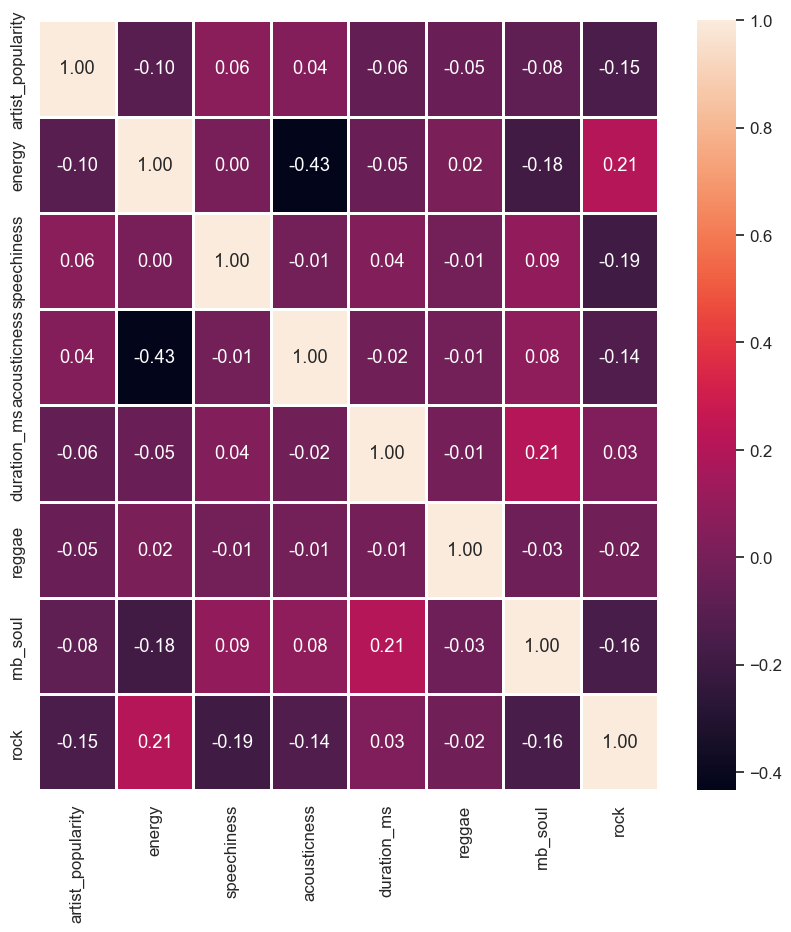

In [236]:
# Heatmap to show correlation between explanatory variables                     

sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(X_train_stepwise.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

### 5.4 Classification Results




In [237]:
X_train_stepwise = sm.add_constant(X_train_stepwise)

logit_model=sm.Logit(y_train,X_train_stepwise)
result=logit_model.fit_regularized()
print(result.summary2())

# Exp(B) and confidence intervals
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['Lower', 'Upper', 'Odds Ratio']
print ("\nexp(B) & confidence intervals: ")
print (np.exp(conf))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.44606143758475736
            Iterations: 72
            Function evaluations: 86
            Gradient evaluations: 72
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: track_popularity Pseudo R-squared: 0.185     
Date:               2025-02-21 23:15 AIC:              1315.1467 
No. Observations:   1454             BIC:              1362.6853 
Df Model:           8                Log-Likelihood:   -648.57   
Df Residuals:       1445             LL-Null:          -795.51   
Converged:          1.0000           LLR p-value:      8.3155e-59
No. Iterations:     72.0000          Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.60

C:\Users\tvalb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\tvalb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


### 5.5 Confusion Matrix

The confusion matrix in this report provides a detailed evaluation of the Logistic Regression model’s performance in classifying songs as popular or not popular based on their attributes. It summarizes the model’s predictions by displaying the number of correctly and incorrectly classified instances across both categories.

To achieve this, we need to define a cutoff threshold to distinguish between positive and negative events, determining which instances are classified as popular and non-popular tracks.
The metrics used to analyze the model are Precition, Sensitivity and Specificity
- Precision: Measures the proportion of correctly predicted positive cases out of all predicted positives. It indicates how many of the tracks classified as popular are actually popular
- Sensitivity: Measures the proportion of actual positive cases that were correctly identified. It shows how well the model captures popular tracks.
- Specificity: Measures the proportion of actual negative cases that were correctly identified. It indicates how well the model identifies non-popular tracks

In [238]:
# Confusion Matrix for the train dataset

cutoff = 0.5 # Every probability above 50% is considered a positive

train_preds = result.predict(X_train_stepwise)
train_preds_binary = (train_preds > cutoff).astype(int)  # Convert to binary labels (0 o 1)
train_conf_matrix = confusion_matrix(y_train, train_preds_binary)

train_conf_matrix_percentage = train_conf_matrix.astype('float') / train_conf_matrix.sum() * 100
train_conf_matrix_percentage = np.round(train_conf_matrix_percentage, 2)

print("Train dataset confusion matrix")
print(train_conf_matrix_percentage)

Train dataset confusion matrix
[[72.35  3.99]
 [17.06  6.6 ]]


In [239]:
# Confusion Matrix for the test dataset

X_test_stepwise = sm.add_constant(X_test_stepwise)

test_preds = result.predict(X_test_stepwise)
test_preds_binary = (test_preds > cutoff).astype(int)  

test_conf_matrix = confusion_matrix(y_test, test_preds_binary)
test_conf_matrix_percentage = test_conf_matrix.astype('float') / test_conf_matrix.sum() * 100
test_conf_matrix_percentage = np.round(test_conf_matrix_percentage, 2)

print(test_conf_matrix_percentage)

[[76.37  2.2 ]
 [15.11  6.32]]


In [240]:
#defines the function to draw the curve with three parameters
def ROCCurve (df, target, txtdataset): #df is the data set, targ is 
    result = sm.Logit(target, df).fit()
    df['pred'] = result.predict(df)

    # AUC
    result = sm.Logit(target, df).fit()
    X_train_stepwise['pred'] = result.predict(df)
    fpr, tpr, thresholds =roc_curve(target, df['pred'])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    
    # Draws the roc curve
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots() 
    title='ROC curve for ' + txtdataset + " dataset"
    ax.set_title(title)
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.plot(fpr, tpr) #False Positive Rate(x axis) vs. True Positive Rate (y axis)
    ax.plot([0, 1], [0, 1], color="green")
    
    # Optimal cut-off
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'cut-off' : pd.Series(thresholds, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    print("Optimal cut-off for accuracy : " , list(roc_t['cut-off']))

### 5.6 ROC Curve

Optimization terminated successfully.
         Current function value: 0.446061
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.444431
         Iterations 8
Area under the ROC curve : 0.786936
Optimal cut-off for accuracy :  [0.2733815870016248]


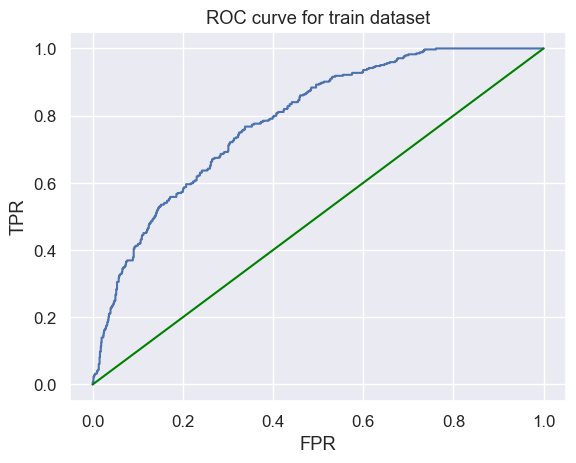

In [241]:
# ROC Curve for the train dataset
ROCCurve (X_train_stepwise, y_train, "train")

C:\Users\tvalb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tvalb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.404465
         Iterations: 35
         Current function value: 0.404300
         Iterations: 35
Area under the ROC curve : 0.813744
Optimal cut-off for accuracy :  [0.2283190169451166]


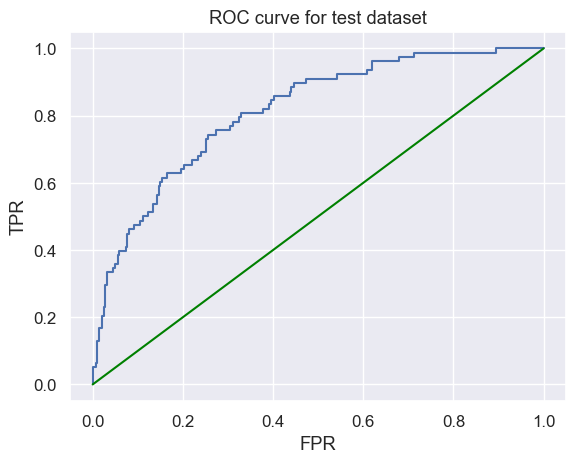

In [242]:
# ROC Curve for the test dataset
ROCCurve (X_test_stepwise, y_test, "test")